In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# %cd /content/drive/MyDrive/Cancer_Hints_Project/

In [5]:
random_state = 1234

In [6]:
hints_data = pd.read_csv("../Data/final_hints_dataset.csv")

In [7]:
print(hints_data.shape)
hints_data.head()

(2422, 41)


,BornInUSA,NotHisp,Mexican,PuertoRican,Cuban,OthHisp,White,Black,AmerInd,AsInd,...,CancerAttention_PrintNews,GeneralHealth,OwnAbilityTakeCareHealth,MedConditions_Diabetes,MedConditions_HighBP,MedConditions_HeartCondition,MedConditions_LungDisease,MedConditions_Arthritis,MedConditions_Depression,EverHadCancer
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,3.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,0.0


In [8]:
cancer_counts = hints_data['EverHadCancer'].value_counts()
cancer_counts

EverHadCancer
0.0    2123
1.0     299
Name: count, dtype: int64

In [9]:
X,y = hints_data.drop(["EverHadCancer"], axis=1), hints_data.EverHadCancer
print(X.shape)

(2422, 40)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

##Train-Test Split

In [11]:
hints_data = pd.read_csv("../Data/final_hints_dataset.csv")
X,y = hints_data.drop(["EverHadCancer"], axis=1), hints_data.EverHadCancer
print(X.shape)
random_state = 1234
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

(2422, 40)


##**Data Balancing with oversampling**

**The function below split the data into training and validation set, perform class balancing by oversampling on training data, train random forest classifier and perform validation with validation split.**

In [12]:
random_state = 1234
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
def trainRFClassisfier_OS(X, y):
  # Oversample the minority class using SMOTE
  sm = SMOTE(random_state=random_state)
  X_resampled, y_resampled = sm.fit_resample(X, y)

  # Split the data into training and test sets
  X_tr, X_val, y_tr, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=random_state)

  # Train the Random Forest classifier
  rfc = RandomForestClassifier(random_state=0, n_estimators=40)
  rfc.fit(X_tr, y_tr)
  return rfc, rfc.score(X_tr, y_tr), rfc.score(X_val, y_val)

In [13]:
model,train_acc, val_acc = trainRFClassisfier_OS(X_train,y_train)
print('Training accuracy:', train_acc, 'Validation accuracy:', val_acc)

Training accuracy: 1.0 Validation accuracy: 0.9382352941176471


###**Performance on test data**

In [14]:
model.score(X_test, y_test)

0.865979381443299

###Confusion matrix


In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
# Predict the labels for the test data
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[414  11]
 [ 54   6]]


###ROC plot

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

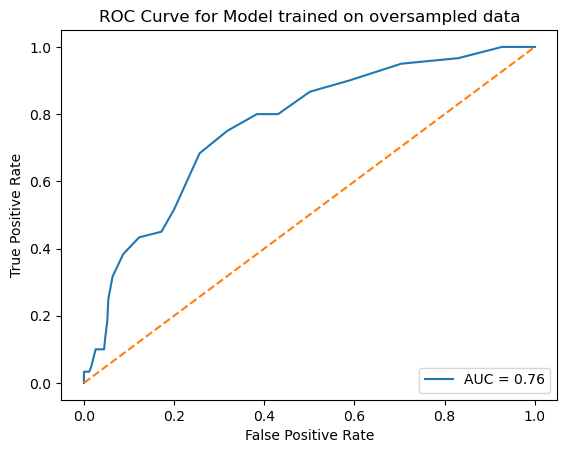

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr)).plot()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve for Model trained on oversampled data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


In [19]:
# Calculate sensitivity and specificity
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)

Sensitivity: 0.9741176470588235
Specificity: 0.1
Precision: 0.35294117647058826


##**Data Balancing with undersampling**


In [20]:
y_train.value_counts()

EverHadCancer
0.0    1698
1.0     239
Name: count, dtype: int64

In [21]:
from imblearn.under_sampling import RandomUnderSampler

In [22]:
random_state = 1234
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
def trainRFClassisfier_US(X, y):
  # Undersampling the minority class using RandomUnderSampler
  rus = RandomUnderSampler(random_state=random_state)
  X_resampled, y_resampled = rus.fit_resample(X, y)

  # Split the data into training and test sets
  X_tr, X_val, y_tr, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

  # Train the Random Forest classifier
  rfc = RandomForestClassifier(random_state=0, n_estimators=40)
  rfc.fit(X_tr, y_tr)
  return rfc, rfc.score(X_tr, y_tr), rfc.score(X_val, y_val)

In [23]:
model,train_acc, val_acc = trainRFClassisfier_US(X_train,y_train)
print('Training accuracy:', train_acc, 'Validation accuracy:', val_acc)

Training accuracy: 0.9973821989528796 Validation accuracy: 0.65625


In [24]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[299 126]
 [ 18  42]]


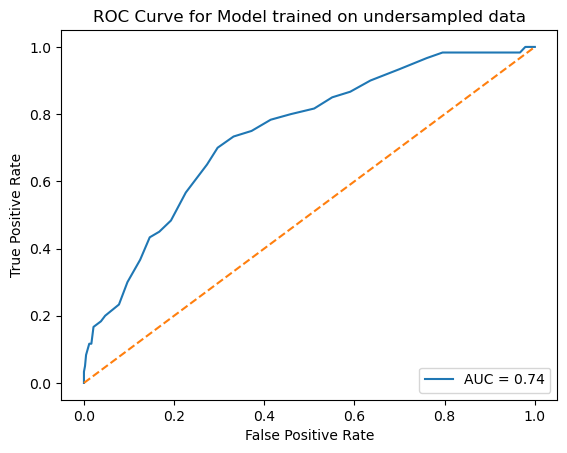

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr)).plot()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve for Model trained on undersampled data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [26]:
# Calculate sensitivity and specificity
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)

Sensitivity: 0.7035294117647058
Specificity: 0.7
Precision: 0.25
